In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df = df.reindex(sorted(df.columns), axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   condition      21597 non-null  int64  
 3   date           21597 non-null  object 
 4   floors         21597 non-null  float64
 5   grade          21597 non-null  int64  
 6   id             21597 non-null  int64  
 7   lat            21597 non-null  float64
 8   long           21597 non-null  float64
 9   price          21597 non-null  float64
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  sqft_living    21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot       21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  view           21534 non-null  float64
 17  waterfront     19221 non-null  float64
 18  yr_bui

In [4]:
df = df.drop(['date', 'id', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
df.head()

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot,view,waterfront,zipcode
0,1.00,3,3,1.0,7,221900.0,1180,0.0,1180,5650,0.0,NaN,98178
1,2.25,3,3,2.0,7,538000.0,2170,400.0,2570,7242,0.0,0.0,98125
2,1.00,2,3,1.0,6,180000.0,770,0.0,770,10000,0.0,0.0,98028
3,3.00,4,5,1.0,7,604000.0,1050,910.0,1960,5000,0.0,0.0,98136
4,2.00,3,3,1.0,8,510000.0,1680,0.0,1680,8080,0.0,0.0,98074


In [5]:
df[df['sqft_basement'].str.contains("\?")]

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot,view,waterfront,zipcode
6,2.25,3,3,2.0,7,257500.0,1715,?,1715,6819,0.0,0.0,98003
18,1.00,2,4,1.0,7,189000.0,1200,?,1200,9850,0.0,0.0,98002
42,2.75,5,3,2.0,9,861990.0,3595,?,3595,5639,0.0,0.0,98053
79,2.50,4,3,2.0,10,720000.0,3450,?,3450,39683,0.0,0.0,98010
112,1.75,3,4,1.0,7,272500.0,1160,?,1540,12600,0.0,0.0,98038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3.00,5,3,1.0,7,504600.0,1390,?,2360,5000,0.0,0.0,98103
21447,2.50,4,3,2.0,7,337500.0,2330,?,2330,4907,0.0,0.0,98042
21473,2.50,2,3,3.0,8,352500.0,980,?,980,1010,0.0,NaN,98117
21519,2.50,4,3,2.0,7,332000.0,2380,?,2380,5737,0.0,0.0,98023


In [6]:
df['sqft_basement'] = df['sqft_basement'].replace("\?", np.NaN, regex=True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   condition      21597 non-null  int64  
 3   floors         21597 non-null  float64
 4   grade          21597 non-null  int64  
 5   price          21597 non-null  float64
 6   sqft_above     21597 non-null  int64  
 7   sqft_basement  21143 non-null  float64
 8   sqft_living    21597 non-null  int64  
 9   sqft_lot       21597 non-null  int64  
 10  view           21534 non-null  float64
 11  waterfront     19221 non-null  float64
 12  zipcode        21597 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.1 MB


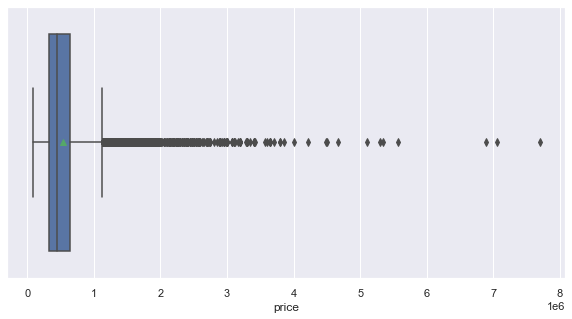

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'price', data = df, showmeans=True)
plt.show()

In [9]:
mean = df['price'].mean()
sd = df['price'].std()
        
df_outliers = df[(df['price'] >= mean+(3*sd))]
print(mean+(3*sd))
df_outliers

1642400.9938097629


,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot,view,waterfront,zipcode
21,2.75,3,3,1.0,9,2000000.0,2330,720.0,3050,44867,4.0,0.0,98040
153,3.25,4,3,2.0,12,2250000.0,3540,1640.0,5180,19850,3.0,0.0,98006
246,2.50,4,3,1.0,9,2400000.0,1830,1820.0,3650,8354,4.0,1.0,98074
269,3.25,4,3,1.5,11,2900000.0,4750,300.0,5050,20100,2.0,0.0,98004
282,3.00,5,5,2.0,9,2050000.0,2630,1200.0,3830,8480,1.0,0.0,98122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,3.75,4,3,2.0,11,1870000.0,3290,500.0,3790,8797,0.0,0.0,98039
21514,3.75,4,3,1.0,11,3000000.0,4180,910.0,5090,14823,0.0,0.0,98004
21524,3.50,5,3,2.0,10,1880000.0,2920,1490.0,4410,13000,3.0,0.0,98006
21552,3.50,4,3,2.0,10,1700000.0,3120,710.0,3830,8963,0.0,0.0,98004


In [10]:
df = df.drop(df[df.price > 1640000].index)

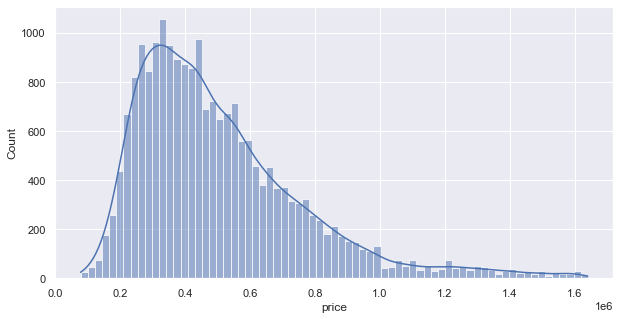

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x = 'price', data = df, kde=True)
plt.show();

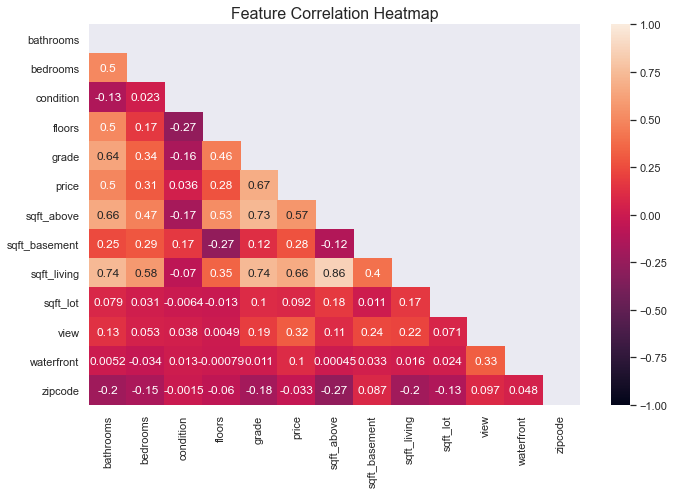

In [12]:
plt.figure(figsize=(11, 7))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature Correlation Heatmap', fontsize=16);

In [13]:
df = df.drop('sqft_above', axis=1)

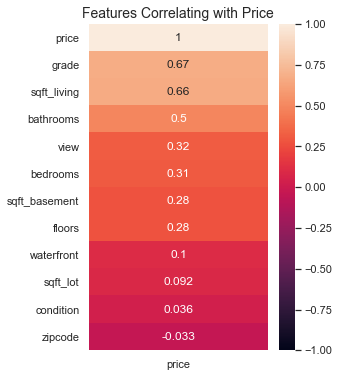

In [14]:
price_corr = df.corr()[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(price_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Price', fontsize=14);

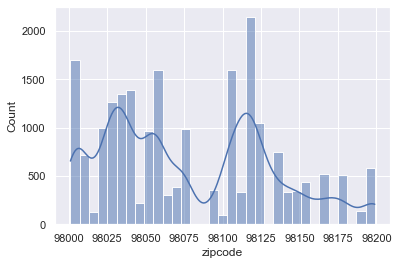

In [15]:
fig, ax = plt.subplots()
sns.histplot(x = 'zipcode', data = df, kde=True)
plt.show();

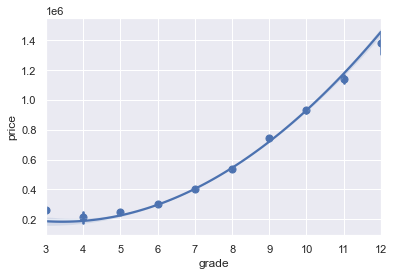

In [16]:
sns.regplot(x='grade', y='price', data=df, x_estimator=np.mean, order=2);

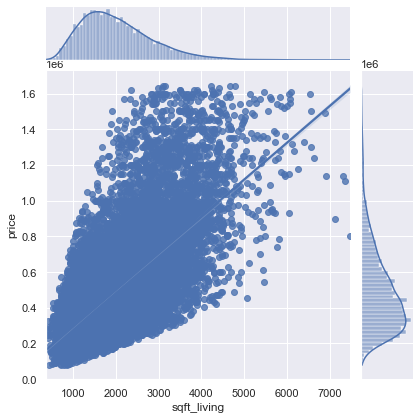

In [17]:
sns.jointplot(x="sqft_living", y="price", data=df, kind='reg')
plt.show();

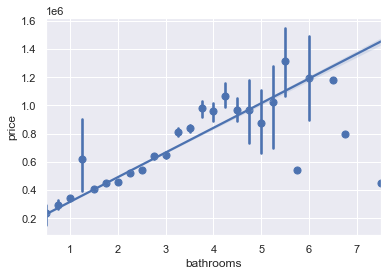

In [19]:
sns.regplot(x='bathrooms', y='price', data=df, x_estimator=np.mean);